In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns

pd.options.display.max_columns=999
pd.options.display.max_rows=999

# Escuelas

In [2]:
escuelas = pd.read_csv('../data/Directorio_Comprensivo_de_Escuelas_P_blicas__Puerto_Rico_2017.csv')

In [3]:
escuelas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 57 columns):
TABLE_ID                              1132 non-null int64
CODIGO                                1132 non-null int64
ESCUELA                               1132 non-null object
REGION                                1132 non-null object
DISTRITO                              1132 non-null object
MUNICIPIO_ESCOLAR                     1118 non-null object
DIRECCIO_FISICA                       1118 non-null object
DIRECCION_MUNICIPIO                   1105 non-null object
DIRECCIO_ESTADO                       1104 non-null object
DIRECCION_ZIPCODE                     1104 non-null object
GEOLOCALIZACION                       1118 non-null object
TELEFONO                              1115 non-null object
FAX                                   1093 non-null object
DIRECTOR                              1117 non-null object
ZONA                                  1118 non-null object
ESTATUS_AC

Quedémonos con las escuelas que tienen información de # de estudiantes (non-null 'MATRICULA_TOTAL') 

In [4]:
escuelas.dropna(subset=['MATRICULA_TOTAL'], inplace=True)

In [5]:
escuelas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1131
Data columns (total 57 columns):
TABLE_ID                              1102 non-null int64
CODIGO                                1102 non-null int64
ESCUELA                               1102 non-null object
REGION                                1102 non-null object
DISTRITO                              1102 non-null object
MUNICIPIO_ESCOLAR                     1102 non-null object
DIRECCIO_FISICA                       1102 non-null object
DIRECCION_MUNICIPIO                   1089 non-null object
DIRECCIO_ESTADO                       1088 non-null object
DIRECCION_ZIPCODE                     1088 non-null object
GEOLOCALIZACION                       1102 non-null object
TELEFONO                              1099 non-null object
FAX                                   1078 non-null object
DIRECTOR                              1101 non-null object
ZONA                                  1102 non-null object
ESTATUS_AC

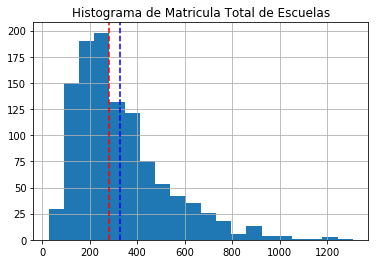

In [6]:
escuelas['MATRICULA_TOTAL'].hist(bins=20)
plt.axvline(x=escuelas['MATRICULA_TOTAL'].mean(), c='b', ls='dashed')
plt.axvline(x=escuelas['MATRICULA_TOTAL'].median(), c='r', ls='dashed')
plt.title('Histograma de Matricula Total de Escuelas');

In [7]:
print('Promedio de estudiantes matriculados por escuela: {}'.format(np.floor(escuelas['MATRICULA_TOTAL'].mean())))

Promedio de estudiantes matriculados por escuela: 329.0


# Resultados de pruebas: 

In [ ]:
x = ['{}_[PROFICIENTE+AVANZADO]', '{}_PRE-BÁSICO', '{}_BÁSICO', '{}_PROFICIENTE', '{}_AVANZADO']
materias = ['ESPAÑOL', 'MATEMÁTICAS', 'INGLÉS']
d = {}
for materia in materias:
    d[materia] = [i.format(materia) for i in x]
    
materias = [i for j in list(d.values()) for i in j]
materias.append('BAJO_NIVEL_POBREZA')

for i in materias:
    escuelas[i] = escuelas[i].str.replace('%','').astype(float)

In [ ]:
escuelas.head(1)

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(escuelas['MATEMÁTICAS_AVANZADO'], escuelas['INGLÉS_AVANZADO'], 
            c=escuelas['ZONA'].map({'URBANA':1, 'RURAL':2}),
            s=escuelas['MATRICULA_TOTAL']*0.25)
plt.xlabel('Matemáticas Avanzado')
plt.ylabel('Inglés Avanzado')

In [ ]:
plt.scatter(escuelas['MATRICULA_TOTAL'], escuelas['MATEMÁTICAS_[PROFICIENTE+AVANZADO]'],
           c=escuelas['ZONA'].map({'URBANA':1, 'RURAL':2}))

In [ ]:
plt.scatter(escuelas['MATRICULA_TOTAL'], escuelas['ESPAÑOL_[PROFICIENTE+AVANZADO]'],
           c=escuelas['ZONA'].map({'URBANA':1, 'RURAL':2}))

In [ ]:
plt.scatter(escuelas['MATRICULA_TOTAL'], escuelas['INGLÉS_[PROFICIENTE+AVANZADO]'],
           c=escuelas['ZONA'].map({'URBANA':1, 'RURAL':2}))

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(escuelas['MATEMÁTICAS_AVANZADO'], escuelas['ESPAÑOL_AVANZADO'], 
            c=escuelas['ZONA'].map({'URBANA':1, 'RURAL':2}),
            s=escuelas['MATRICULA_TOTAL']*0.25)
plt.xlabel('Matemáticas Avanzado')
plt.ylabel('Español Avanzado')

In [ ]:
plt.scatter(escuelas['MATRICULA_TOTAL'], escuelas['MATEMÁTICAS_AVANZADO'],
            c = escuelas['ZONA'].map({'URBANA':1, 'RURAL':2}))

In [ ]:
plt.scatter(escuelas['MATRICULA_TOTAL'], escuelas['MATEMÁTICAS_PRE-BÁSICO'])

In [ ]:
plt.scatter(escuelas['MATRICULA_TOTAL'], escuelas['INGLÉS_AVANZADO'],
            c = escuelas['ZONA'].map({'URBANA':1, 'RURAL':2}))

In [ ]:
escuelas['ZONA'].value_counts(dropna=False)

In [ ]:
sns.factorplot(x='REGION', y='INGLÉS_BÁSICO', hue='ZONA', data=escuelas, kind='bar' )
plt.xticks(rotation=90)

In [ ]:
sns.factorplot(x='REGION', y='MATRICULA_TOTAL', hue='ZONA', data=escuelas, kind='bar' )
plt.xticks(rotation=90)

In [ ]:
sns.factorplot(x='REGION', y='BAJO_NIVEL_POBREZA', hue='ZONA', data=escuelas, kind='bar' )
plt.xticks(rotation=90)

In [ ]:
sns.factorplot(x='REGION', y='INGLÉS_AVANZADO', hue='ZONA', data=escuelas, kind='bar' )
plt.xticks(rotation=90)

In [ ]:
escuelas.head(1)

In [ ]:
escuelas.dtypes.value_counts()

In [ ]:
escuelas['DIRECCION_MUNICIPIO'] = escuelas['DIRECCION_MUNICIPIO'].str.replace('PUNTA SANTIAGO, HUMACAO', 'HUMACAO')

In [ ]:
# objects
escuelas_object = escuelas.select_dtypes(include=[object])
escuelas_object.head()

In [ ]:
escuelas_object.describe()

In [ ]:
escuelas_int = escuelas.select_dtypes(include=[int])

In [ ]:
escuela_codigo_nombre = pd.DataFrame()
escuela_codigo_nombre['codigo'] = escuelas_int['CODIGO']
escuela_codigo_nombre['nombre'] = escuelas_object['ESCUELA']
escuela_codigo_nombre.set_index('codigo', inplace=True)
escuela_codigo_nombre.sort_index(inplace=True)

escuela_codigo_nombre.head()

In [ ]:
escuelas.head()

In [ ]:
escuelas['BAJO_NIVEL_POBREZA'].hist()

In [ ]:
# import sys

# sys.path.append('/Users/caoba/projects/puertorico/src')

# import utils
# utils.load_data()

In [ ]:
# # Pobreza: # de estudiates bajo el nivel de pobreza en cada escuela publica

# pobreza = pd.read_csv('../data/N_mero_de_estudiantes_bajo_el_nivel_de_pobreza_en_cada_escuela_p_blica__a_o_escolar_2013-2014.csv')

# pobreza.info()

# pobreza['%'] = pobreza['Porcentaje de Estudiantes Bajo el Nivel de Pobreza (BNP)'].str.replace('%', '').astype(float)

# pd.qcut(pobreza['%'], q=5).value_counts().sort_index()

# #80% de las escuelas tienen más de 71.6% estudiantes bajo en nivel de probreza. 

# pobreza = pobreza.iloc[:1442]
# pobreza.groupby('Región').mean()['%']

# pobreza.groupby(['Región', 'Distrito']).mean()['%']

# pobreza['Matrícula M1 entre 5 y 17 años de edad'].hist(alpha=0.5)
# pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza'].hist(alpha=0.5)
# plt.title('Histograma de Matrícula M1 entre 5 y 17 años de edad\n Todas las escuelas')
# plt.legend(['total', 'bajo el nivel de probreza'])
# plt.axvline(x = pobreza['Matrícula M1 entre 5 y 17 años de edad'].mean(), c='b', ls='dashed')
# plt.axvline(x = pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza'].mean(), c='g', ls='dashed')
# plt.xlabel('número de estudiantes')
# plt.ylabel('número de escuelas')

# pobreza['Matrícula M1 entre 5 y 17 años de edad'].mean()

# pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza'].mean()

# pobreza['ratio'] = pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza']/pobreza['Matrícula M1 entre 5 y 17 años de edad']

# pobreza['ratio'].hist(bins=20)
# plt.axvline(x=pobreza['ratio'].mean(), c='b', ls='dashed')
# plt.axvline(x=pobreza['ratio'].median(), c='b', ls='dotted')

# pd.qcut(pobreza['ratio'], q=5).value_counts().sort_index()

# pobreza['ratio'].mean()

# # Matrícula promedio de una escuela (5 - 17 años) : 283 estudiantes
# # 
# # Matrícula promedio de una escuela (5 - 17 años): Estudiantes Bajo Nivel Pobreza: 218. 
# # 
# # Proporción promedio de estudiantes BNP a estudiantes, 5 - 17 años: 78.5%. 
# # 
# # Alrededor de 80% de las escuelas tienen más de 71.6% de sus estudiantes de 5 - 17 años matriculados bajo el nivel de pobreza.  

# pobreza['ratio_matricula'] = pobreza['Matrícula M1 entre 5 y 17 años de edad']/pobreza['Matrícula M1']

# pobreza['ratio_matricula'].hist()

# pobreza['ratio_matricula'].idxmin()

# # escuelas[escuelas['GRADOS_ORIGINAL'] == '42889']
# # escuelas[escuelas['CODIGO'] == 32300]

# pobreza.iloc[651]

# pobreza[['Código de la Escuela', 'Nombre Escuela']].head()


# pobreza_codigo_nombre = pobreza[['Código de la Escuela', 'Nombre Escuela']]
# pobreza_codigo_nombre.rename(columns={'Código de la Escuela':'codigo', 'Nombre Escuela':'nombre'}, inplace=True)
# #pobreza_codigo_nombre.set_index('codigo', inplace=True)
# pobreza_codigo_nombre.head()

# pobreza_codigo_nombre.shape

# pobreza_codigo_nombre.shape[0] - escuela_codigo_nombre.shape[0]

# # Un dataset es del 2013 y otro del 2017. ¿Se cerraron/consolidaron 310 escuelas desde entonces?

# df = pd.merge(pobreza_codigo_nombre, escuela_codigo_nombre, how='outer', on='codigo', suffixes=('_2013', '_2017'))

# pobreza.head(1)

# pobreza.groupby('Región').mean()['%']

# pobreza.groupby('Distrito').mean()['%'].nlargest(10)

# pobreza.groupby('Municipio Escolar').mean()['%'].nlargest(10)

# pobreza.groupby('Municipio Escolar').mean()['%'].nsmallest(10)

# num_escuelas_municipio_escolar = pobreza.groupby(['Región', 'Distrito', 'Municipio Escolar']).size().to_frame('#')

# num_escuelas_municipio_escolar.shape

# num_escuelas_municipio_escolar['#'].hist()
# plt.axvline(x=num_escuelas_municipio_escolar['#'].mean(), c='b', ls='dashed')
# plt.title('Histograma de numero de escuelas por municipio escolar');
# plt.xlabel('numero de escuelas')
# plt.ylabel('frecuencia')

In [ ]:
escuela_codigo_nombre.shape

In [ ]:
escuela_codigo_nombre.reset_index(inplace=True)
escuela_codigo_nombre.head()

### Clean zipcodes

In [ ]:
escuelas['DIRECCION_ZIPCODE'].dtype

In [ ]:
escuelas['DIRECCION_ZIPCODE'].head(10)

In [ ]:
def extract_zip_z4(x):
    try:
        if '-' in x:
            zip_ = x.split('-')[0]
            z4 = x.split('-')[1]
        else:
            zip_ = x[:-4]
            z4 = x[-4:]
    
        if len(zip_)!=5:
            zip_ = zip_.zfill(5)
        
        return zip_, z4
    except:
        return None

In [ ]:
escuelas['zipcode'] = escuelas['DIRECCION_ZIPCODE'].apply(lambda x: extract_zip_z4(x))

In [ ]:
escuelas['zipcode'].head(10)

In [ ]:
escuelas['zip'] = escuelas['zipcode'].apply(lambda x:x[0] if pd.notnull(x) else None)
escuelas['z4'] = escuelas['zipcode'].apply(lambda x:x[1] if pd.notnull(x) else None)

In [ ]:
escuelas.head(1)

In [ ]:
escuelas['GEOLOCALIZACION'] = escuelas['GEOLOCALIZACION'].str.replace('(','')

In [ ]:
escuelas['GEOLOCALIZACION'] = escuelas['GEOLOCALIZACION'].str.replace(')','')

In [ ]:
escuelas['GEOLOCALIZACION'] = escuelas['GEOLOCALIZACION'].str.split(', ')

In [ ]:
escuelas['GEOLOCALIZACION'].head()

In [ ]:
escuelas['longitud'] = escuelas['GEOLOCALIZACION'].apply(lambda x: x[0] if np.all(pd.notnull(x)) else None).astype(float)
escuelas['latitud'] = escuelas['GEOLOCALIZACION'].apply(lambda x: x[1] if np.all(pd.notnull(x)) else None).astype(float)

In [ ]:
escuelas['ZONA'].value_counts(dropna=False)

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(escuelas['latitud'], escuelas['longitud'], marker='o', c=escuelas['ZONA'].map({'URBANA':1,
                                                                                           'RURAL':2,
                                                                                           np.nan: 3}))

In [ ]:
escuelas.head(1)

In [ ]:
z_bnp = (escuelas['BAJO_NIVEL_POBREZA'] - escuelas['BAJO_NIVEL_POBREZA'].mean())/escuelas['BAJO_NIVEL_POBREZA'].std()

In [ ]:
escuelas['BAJO_NIVEL_POBREZA'].hist()

In [ ]:
z_bnp.hist()

In [ ]:
plt.rcParams['image.cmap'] = 'cool'

In [ ]:
(np.sign(z_bnp)*z_bnp*z_bnp).hist(bins=20)

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(escuelas['latitud'], escuelas['longitud'], 
            marker='o', 
            s=escuelas['MATRICULA_TOTAL']*0.25, 
            c=escuelas['ZONA'].map({'URBANA': 2,'RURAL':1,np.nan: 3}),
            edgecolor='k')

In [ ]:
plt.figure(1)
escuelas['BAJO_NIVEL_POBREZA'].hist()
plt.figure(2)
z_bnp.hist()

In [ ]:
escuelas.head(1)

In [ ]:
escuelas.info()

- 'MATRICULA TOTAL'
- 'MATERIAS'
- 'GRADOS' 
- 'POBREZA'

In [ ]:
materias.pop(materias.index('BAJO_NIVEL_POBREZA')) #percentage

In [ ]:
materias

In [ ]:
df_materias = escuelas[materias]

In [ ]:
df_materias.info()

In [ ]:
escuelas.shape

In [ ]:
escuelas = escuelas.drop(index = df_materias[df_materias['ESPAÑOL_BÁSICO'].isnull()].index)

In [ ]:
df_materias = escuelas[materias]

In [ ]:
df_materias.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
ss = StandardScaler()
x_materias = ss.fit_transform(df_materias)
pca = PCA(0.9, whiten=True)
x_materias = pca.fit_transform(x_materias)

plt.scatter(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum())

In [ ]:
pca.n_components_

In [ ]:
sns.heatmap(pca.components_.transpose(), yticklabels=df_materias.columns, cmap='Greys')

In [ ]:
x_materias.shape

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(5)

km.fit(x_materias)

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
silhouette_score(x_materias, labels = km.labels_)

In [ ]:
plt.hist(silhouette_samples(x_materias, labels = km.labels_));

In [ ]:
np.sort(silhouette_samples(x_materias, km.labels_))

In [ ]:
n_components = range(2, 10)
scores = []
inertias = []
for n in n_components:
    km = KMeans(n)
    km.fit(x_materias)
    scores.append(silhouette_score(x_materias, labels = km.labels_))
    inertias.append(km.inertia_)

In [ ]:
plt.scatter(n_components, scores)
#plt.scatter(n_components, inertias)

# Grados

In [ ]:
grados = [i for i in escuelas.columns if 'GRADO_' in i]

In [ ]:
escuelas[grados].fillna(0, inplace=True)

In [ ]:
escuelas[grados] = escuelas[grados].fillna(0)

In [ ]:
escuelas[grados].head()

In [ ]:
escuelas['matricula'] = escuelas[grados].sum(axis=1)

In [ ]:
grados.extend(['matricula'])

In [ ]:
escuelas[grados].shape

In [ ]:
ss = StandardScaler()
X = ss.fit_transform(escuelas[grados])
pca = PCA(0.9, whiten=True)
pca.fit(X)

In [ ]:
plt.scatter(range(1, pca.n_components_+1), pca.explained_variance_ratio_.cumsum())

In [ ]:
X = pd.DataFrame(X, columns=grados)

In [ ]:
sns.heatmap(X.corr())

In [ ]:
sns.heatmap(pca.components_.transpose(), yticklabels=grados, cmap='Greys')

In [ ]:
X_reconstructed = pca.inverse_transform(pca.transform(X)) #this works for new X's. can do something like X_train, X_test and test. 

In [ ]:
X_reconstructed = ss.inverse_transform(X_reconstructed)

In [ ]:
X_reconstructed = pd.DataFrame(X_reconstructed, columns=grados)

In [ ]:
X_reconstructed['matricula'].hist(alpha=0.7)
X['matricula'].hist(alpha=0.5)

In [ ]:
grados

In [ ]:
materias

In [ ]:
escuelas_ = escuelas[grados+materias + ['BAJO_NIVEL_POBREZA']]

In [ ]:
columnas = escuelas_.columns

In [ ]:
escuelas_.head(1)

In [ ]:
from sklearn.preprocessing import Imputer

In [ ]:
imputer = Imputer(strategy='mean')

In [ ]:
escuelas_.info()

In [ ]:
escuelas_ = pd.DataFrame(imputer.fit_transform(escuelas_), columns=columnas)

In [ ]:
escuelas_ = ss.fit_transform(escuelas_)
pca = PCA(7, whiten=True)
pca.fit(escuelas_)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(pca.components_.transpose(), yticklabels=columnas, cmap='Greys')

In [ ]:
plt.scatter(range(1, pca.n_components_+1), pca.explained_variance_ratio_.cumsum())

In [ ]:
escuelas_transformed = pca.fit_transform(escuelas_)
escuelas_transformed = pd.DataFrame(escuelas_transformed, columns=['pca_{}'.format(i) for i in range(1, pca.n_components_+1)])

In [ ]:
escuelas_transformed.shape

In [ ]:
escuelas.shape

In [ ]:
escuelas_transformed['zona'] = escuelas['ZONA'].map({'URBANA':0, 'RURAL':1})

In [ ]:
escuelas_transformed['zona'].value_counts(dropna=False)

In [ ]:
escuelas_transformed.info()

In [ ]:
escuelas_transformed.dropna(inplace=True)

In [ ]:
escuelas_transformed.head()

In [ ]:
escuelas_transformed.shape

In [ ]:
pca.n_components_

In [ ]:
escuelas_transformed.head()

In [ ]:
#escuelas_transformed.drop('zona', axis=1, inplace=True)

In [ ]:
km = KMeans()

In [ ]:
km.fit(escuelas_transformed.drop('zona', axis=1))

In [ ]:
km.inertia_

In [ ]:
silhouette_score(escuelas_transformed.drop('zona', axis=1),km.labels_)

In [ ]:
sil_scores = []
inertias = [] 
for n in range(2, 15):
    km = KMeans(n)
    km.fit(escuelas_transformed.drop('zona', axis=1))
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(escuelas_transformed.drop('zona', axis=1), km.labels_))

In [ ]:
plt.scatter(range(2, 15), sil_scores)

In [ ]:
plt.scatter(range(2, 15), inertias)

In [ ]:
escuelas_transformed.drop('zona', axis=1).head(1)

In [ ]:
plt.scatter(escuelas_transformed['pca_1'], escuelas_transformed['pca_2'])

In [ ]:
plt.scatter(escuelas_transformed['pca_1'], escuelas_transformed['pca_2'], c = KMeans(8).fit(escuelas_transformed).labels_)

# Can we predict urban/rural zone using pca transformed features? 

In [ ]:
X = escuelas_transformed[['pca_{}'.format(i) for i in range(1,pca.n_components_+1)]]
#y = escuelas_transformed['zona']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
lr = LogisticRegression(penalty='l1', C=0.01)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skfold = StratifiedKFold(n_splits=5)

In [ ]:
cross_validate(lr, X_train, y_train, cv=skfold)

In [ ]:
escuelas.head(1)

In [ ]:
pd.crosstab(escuelas['ZONA'], escuelas['NIVEL_ORIGINAL'] )

In [ ]:
pd.crosstab(escuelas['ZONA'], escuelas['REGION'] )

- - - 
# Admitidos a la Universidad de Puerto Rico

In [ ]:
# Admitidos

# admitidos = pd.read_csv('../data/Admitidos_a_la_Universidad_de_Puerto_Rico_desde_2009_hasta_2013.csv', encoding='utf8')

# admitidos.head()

# admitidos['año_admision'] = admitidos['CALENDARIO'].apply(lambda x: 2000 + int(x.split()[-1].split('-')[0]))
# sns.factorplot(x='año_admision', y='GPA', hue='CAMPUS', data=admitidos)
# plt.xticks(rotation=90)

# #admitidos['INSTITUCION DE PROCEDENCIA'].apply(lambda x: x.split('-')[0])

# #admitidos['INSTITUCION DE PROCEDENCIA'].apply(lambda x: x.split('-')[1])

# Pobreza

In [ ]:
# # Pobreza: # de estudiates bajo el nivel de pobreza en cada escuela publica

# pobreza = pd.read_csv('../data/N_mero_de_estudiantes_bajo_el_nivel_de_pobreza_en_cada_escuela_p_blica__a_o_escolar_2013-2014.csv')

# pobreza.info()

# pobreza['%'] = pobreza['Porcentaje de Estudiantes Bajo el Nivel de Pobreza (BNP)'].str.replace('%', '').astype(float)

# pd.qcut(pobreza['%'], q=5).value_counts().sort_index()

# #80% de las escuelas tienen más de 71.6% estudiantes bajo en nivel de probreza. 

# pobreza = pobreza.iloc[:1442]
# pobreza.groupby('Región').mean()['%']

# pobreza.groupby(['Región', 'Distrito']).mean()['%']

# pobreza['Matrícula M1 entre 5 y 17 años de edad'].hist(alpha=0.5)
# pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza'].hist(alpha=0.5)
# plt.title('Histograma de Matrícula M1 entre 5 y 17 años de edad\n Todas las escuelas')
# plt.legend(['total', 'bajo el nivel de probreza'])
# plt.axvline(x = pobreza['Matrícula M1 entre 5 y 17 años de edad'].mean(), c='b', ls='dashed')
# plt.axvline(x = pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza'].mean(), c='g', ls='dashed')
# plt.xlabel('número de estudiantes')
# plt.ylabel('número de escuelas')

# pobreza['Matrícula M1 entre 5 y 17 años de edad'].mean()

# pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza'].mean()

# pobreza['ratio'] = pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza']/pobreza['Matrícula M1 entre 5 y 17 años de edad']

# pobreza['ratio'].hist(bins=20)
# plt.axvline(x=pobreza['ratio'].mean(), c='b', ls='dashed')
# plt.axvline(x=pobreza['ratio'].median(), c='b', ls='dotted')

# pd.qcut(pobreza['ratio'], q=5).value_counts().sort_index()

# pobreza['ratio'].mean()

# # Matrícula promedio de una escuela (5 - 17 años) : 283 estudiantes
# # 
# # Matrícula promedio de una escuela (5 - 17 años): Estudiantes Bajo Nivel Pobreza: 218. 
# # 
# # Proporción promedio de estudiantes BNP a estudiantes, 5 - 17 años: 78.5%. 
# # 
# # Alrededor de 80% de las escuelas tienen más de 71.6% de sus estudiantes de 5 - 17 años matriculados bajo el nivel de pobreza.  

# pobreza['ratio_matricula'] = pobreza['Matrícula M1 entre 5 y 17 años de edad']/pobreza['Matrícula M1']

# pobreza['ratio_matricula'].hist()

# pobreza['ratio_matricula'].idxmin()

# # escuelas[escuelas['GRADOS_ORIGINAL'] == '42889']
# # escuelas[escuelas['CODIGO'] == 32300]

# pobreza.iloc[651]

# pobreza[['Código de la Escuela', 'Nombre Escuela']].head()


# pobreza_codigo_nombre = pobreza[['Código de la Escuela', 'Nombre Escuela']]
# pobreza_codigo_nombre.rename(columns={'Código de la Escuela':'codigo', 'Nombre Escuela':'nombre'}, inplace=True)
# #pobreza_codigo_nombre.set_index('codigo', inplace=True)
# pobreza_codigo_nombre.head()

# pobreza_codigo_nombre.shape

# pobreza_codigo_nombre.shape[0] - escuela_codigo_nombre.shape[0]

# # Un dataset es del 2013 y otro del 2017. ¿Se cerraron/consolidaron 310 escuelas desde entonces?

# df = pd.merge(pobreza_codigo_nombre, escuela_codigo_nombre, how='outer', on='codigo', suffixes=('_2013', '_2017'))

# pobreza.head(1)

# pobreza.groupby('Región').mean()['%']

# pobreza.groupby('Distrito').mean()['%'].nlargest(10)

# pobreza.groupby('Municipio Escolar').mean()['%'].nlargest(10)

# pobreza.groupby('Municipio Escolar').mean()['%'].nsmallest(10)

# num_escuelas_municipio_escolar = pobreza.groupby(['Región', 'Distrito', 'Municipio Escolar']).size().to_frame('#')

# num_escuelas_municipio_escolar.shape

# num_escuelas_municipio_escolar['#'].hist()
# plt.axvline(x=num_escuelas_municipio_escolar['#'].mean(), c='b', ls='dashed')
# plt.title('Histograma de numero de escuelas por municipio escolar');
# plt.xlabel('numero de escuelas')
# plt.ylabel('frecuencia')

# Melt

In [ ]:
#Create example dataframe
a = {'a':['a1','a2','a3'],'b':['b1','b2','b3']}
df = pd.DataFrame.from_dict(a)
df = df.T
df = df.reset_index()
df.columns = ['brand','1','2','3']
df = pd.melt(df, id_vars =['brand'])

In [ ]:
df

# Stack

In [ ]:
df.stack()

In [ ]:
df.unstack().to_frame()